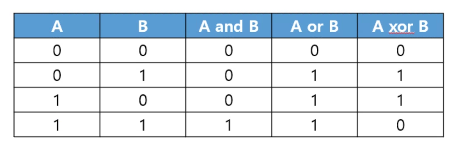

### 목표
- AND연산을 통해서 모델을 학습시키고 결과를 예측하는 실습을 진행
- 머신러닝의 과정

#### 머신러닝 과정
1. 문제정의(내목표, 어떤 프로젝트할건지? 학습종류)
2. 데이터수집(크롤링, DB, 공공데이터포털다운 등..)
3. 데이터 전처리(Preprocessing)(오탈자제거, 이상치 처리, 결측지 처리 등..)
4. 탐색적데이터분석(EDA)(기술통계량, 상관분석 등..)
5. 모델 선택, 하이퍼 파라미터(사용자 정의 매개변수) 조정
6. 모델학습(훈련)
7. 모델 평가 및 예측

In [1]:
import pandas as pd

#### AND 연산 학습
- 데이터준비

In [2]:
#키 : 컬럼명
# [밸류, 밸류2] : 해당 컬럼 데이터들
df = pd.DataFrame({'A':[0,0,1,1,1,0,1,0],
                   'B':[0,1,0,1,0,0,1,1],
                   'A and B':[0,0,0,1,0,0,1,0]})
df

,A,B,A and B
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,0,0,0
6,1,1,1
7,0,1,0


- 데이터 분리  
문제와 답 분리  
훈련데이터와 테스트 데이터로 분리

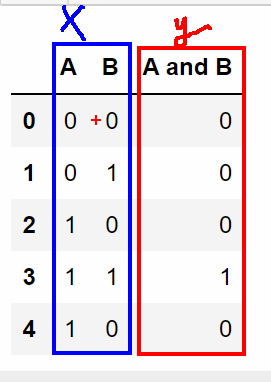

In [3]:
# 문제와 답
# A,B 2개의 특성이 문제 데이터(특성데이터, 속성, 특징, 독립변수)
X = df[['A','B']]
#X.loc[:, ['A','B']]
#X.loc[:,:'B']
#X.iloc[:,[0,1]]
#X.iloc[:,:2]

# A and B 답데이터(레이블 Label = 클래스class = 카테고리)
y = df['A and B'] # 정답 데이터 인덱싱
y

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
Name: A and B, dtype: int64

In [4]:
# 훈련용, 테스트용 분리
# 전체가 1, 훈련용 0.7:테스트 0.3 통상적으로 분리
# 0~5(6개) 훈련용으로
# 6~7(2개) 테스트용으로
X_train = X.loc[:5,]# 훈련용 문제 
X_test = X.loc[6:,]# 테스트용 문제
y_train = y.loc[:5]# 훈련용 답
y_test = y.loc[6:]# 훈련용 문제

In [5]:
X_train

,A,B
0,0,0
1,0,1
2,1,0
3,1,1
4,1,0
5,0,0


In [6]:
X_test

,A,B
6,1,1
7,0,1


In [7]:
y_train

0    0
1    0
2    0
3    1
4    0
5    0
Name: A and B, dtype: int64

In [8]:
y_test

6    1
7    0
Name: A and B, dtype: int64

In [11]:
#데이터 분리 : 크기 확인
print(X_train.shape) #훈련용 문제
print(y_train.shape) #훈련용 답
print(X_test.shape) #테스트용 문제
print(y_test.shape) #테스트용 답

# 각 훈련용 테스트용 끼리의 행의 개수 파악
# 훈련용, 테스트용 문제 특성 개수 파악(동일해야함)

(6, 2)
(6,)
(2, 2)
(2,)


- ML 모델 학습하기

In [12]:
# KNN 최근접 이웃 알고리즘
# 가장 가까운 이웃(TRAIN)의 결과값(실제답)을 확인하여 TEST데이터도 그럴 것이다 예측
from sklearn.neighbors import KNeighborsClassifier # 분류 모델

In [13]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors = 1) # n_neighbors = 1 이웃 1개만 확인

In [14]:
# 모델 학습
# fit : 데이터에 맞춰서 모델을 학습시킨다.
# 학습 유형 : 지도학습(문제, 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
X_test

,A,B
6,1,1
7,0,1


In [17]:
# 모델 예측
# predict(테스트용 문제)
pre = knn_model.predict(X_test) #문제 2개

In [18]:
# 모델 평가
from sklearn.metrics import accuracy_score #평가하기 위한 도구(정확도)
# 0은 0이라고 얼마나 잘 맞췄는지? 1은 1이라고 얼마나 잘 맞췄는지?
# 확률 값으로 출력됨
accuracy_score(pre,y_test) #100% 맞췄음

1.0